In [1]:
import cx_Oracle
import pandas as pd
import matplotlib as plt
import psycopg2 as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
%matplotlib inline
sns.set(color_codes=True)

ModuleNotFoundError: No module named 'cx_Oracle'

In [379]:
ora_conn = cx_Oracle.connect('carmi6/changeme@rsmdsdwdev1:1521/dwdev_rf')

In [391]:
df2 = pd.read_sql("select \
                 A.DIASTOLIC, \
                 A.SYSTOLIC, \
                 A.SMOKING_STATUS, \
                 A.WEIGHT_RESULT, \
                 A.BMI_CALCULATED \
from REPORTS.VW_SRS_HTN_PATIENT_STATS A \
where A.BMI_CALCULATED < 90 \
AND A.BMI_CALCULATED > 10", con=ora_conn) 

df2[['DIASTOLIC','SYSTOLIC','WEIGHT_RESULT','BMI_CALCULATED']] = df2[['DIASTOLIC','SYSTOLIC','WEIGHT_RESULT','BMI_CALCULATED']].astype(float)

df2 = df2.fillna(df2.mean())
# df = df.reset_index()


In [392]:
df2.dtypes

DIASTOLIC         float64
SYSTOLIC          float64
SMOKING_STATUS     object
WEIGHT_RESULT     float64
BMI_CALCULATED    float64
dtype: object

In [393]:
df2.head()

,DIASTOLIC,SYSTOLIC,SMOKING_STATUS,WEIGHT_RESULT,BMI_CALCULATED
0,83.0,117.0,NONSMOKER,234.0,37.61
1,91.0,130.0,SMOKER,158.0,27.12
2,68.0,120.0,NONSMOKER,146.0,29.49
3,74.0,138.0,NONSMOKER,231.0,36.45
4,70.0,136.0,NONSMOKER,152.0,24.53


In [394]:
df2.count()

DIASTOLIC         59960
SYSTOLIC          59960
SMOKING_STATUS    59686
WEIGHT_RESULT     59960
BMI_CALCULATED    59960
dtype: int64

In [395]:
df2.describe().round(2)

,DIASTOLIC,SYSTOLIC,WEIGHT_RESULT,BMI_CALCULATED
count,59960.00,59960.00,59960.00,59960.00
mean,75.22,127.44,191.65,30.64
std,9.89,14.09,50.44,6.70
min,20.00,60.00,0.00,10.99
25%,70.00,119.00,156.00,26.07
50%,76.00,128.00,186.00,29.57
75%,82.00,136.00,220.00,34.11
max,148.00,245.00,655.00,88.83


In [397]:
print df2.nlargest(5, 'DIASTOLIC')

       DIASTOLIC  SYSTOLIC SMOKING_STATUS  WEIGHT_RESULT  BMI_CALCULATED
30620      148.0     168.0      NONSMOKER          241.0           32.69
41326      144.0     151.0      NONSMOKER          217.8           28.74
7128       135.0     168.0      NONSMOKER          204.0           28.86
19179      134.0     181.0      NONSMOKER          139.0           22.44
25923      130.0     158.0      NONSMOKER          133.0           24.39


In [400]:
df2.shape

(59960, 5)

In [401]:
df2.columns

Index([u'DIASTOLIC', u'SYSTOLIC', u'SMOKING_STATUS', u'WEIGHT_RESULT',
       u'BMI_CALCULATED'],
      dtype='object')

In [402]:
df2.columns

Index([u'DIASTOLIC', u'SYSTOLIC', u'SMOKING_STATUS', u'WEIGHT_RESULT',
       u'BMI_CALCULATED'],
      dtype='object')

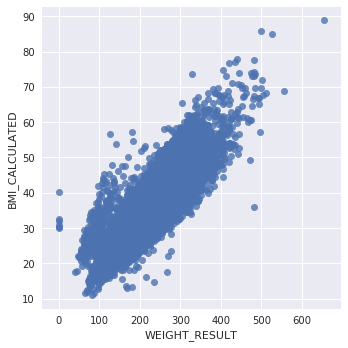

In [403]:
sns.lmplot('WEIGHT_RESULT','BMI_CALCULATED', data=df2, fit_reg=False)

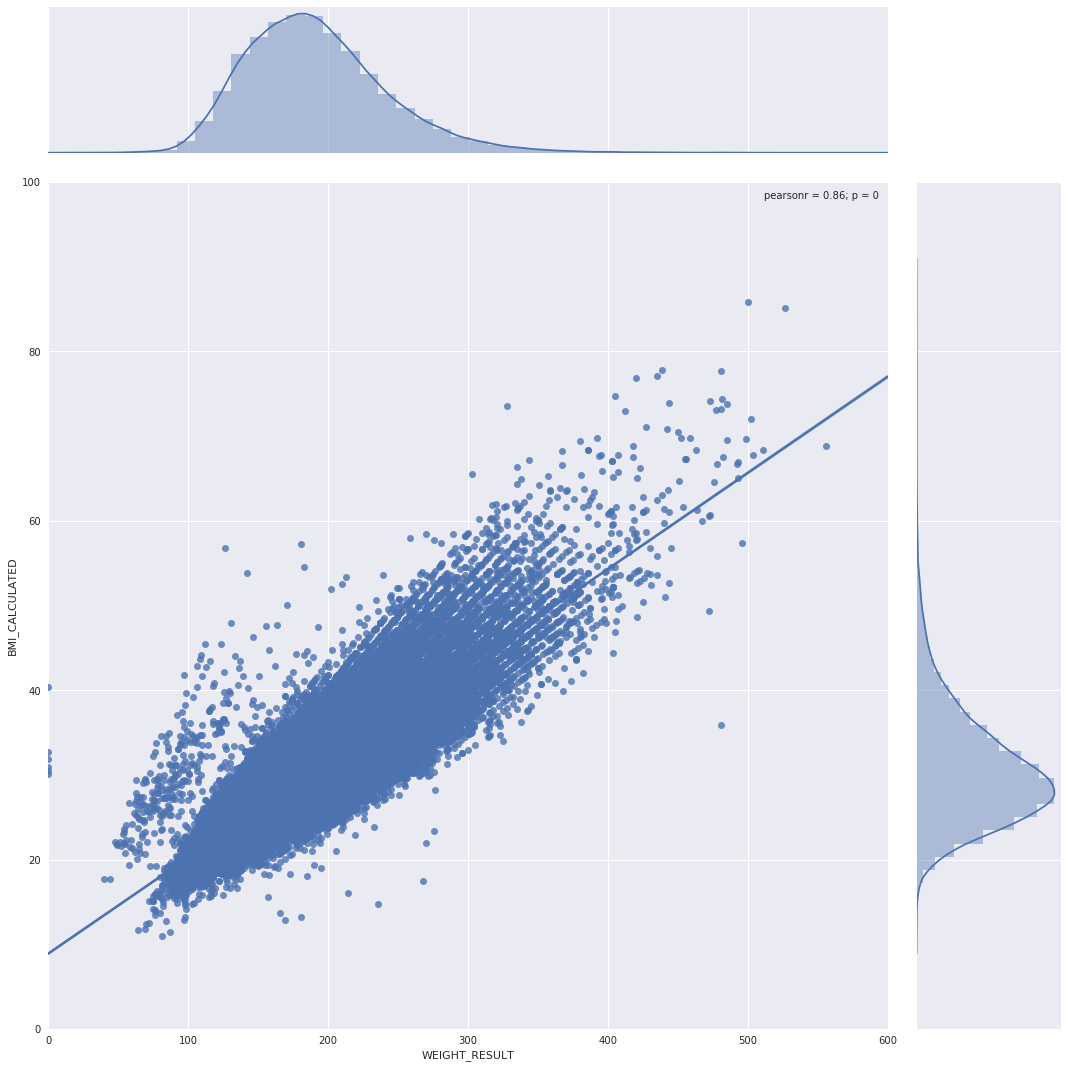

In [404]:
g = sns.jointplot("WEIGHT_RESULT", "BMI_CALCULATED", data=df2, kind="reg",
                  xlim=(0, 600), ylim=(0, 100), color="b", size=15)

KeyError: 'Level network must be same as name (None)'

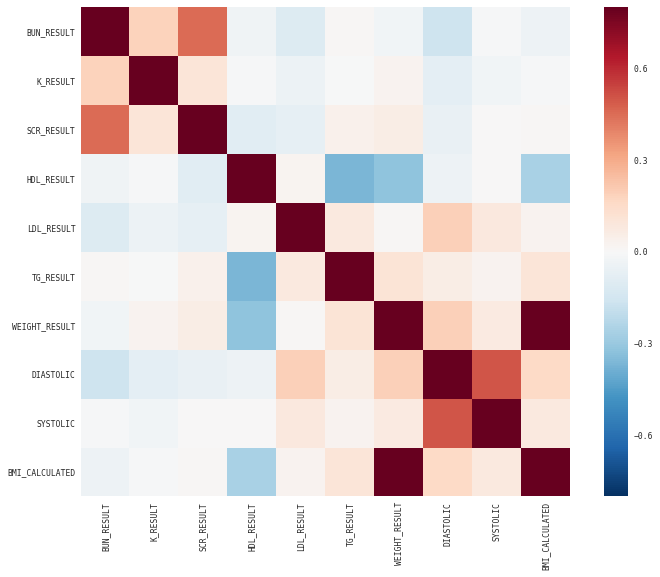

In [310]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

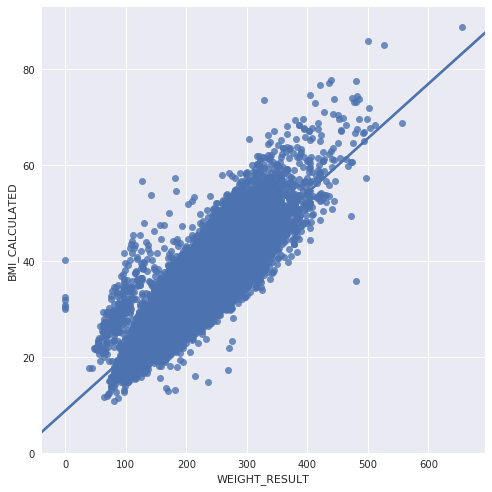

In [406]:
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x="WEIGHT_RESULT", y="BMI_CALCULATED", data=df2,
               palette=pal, size=7)

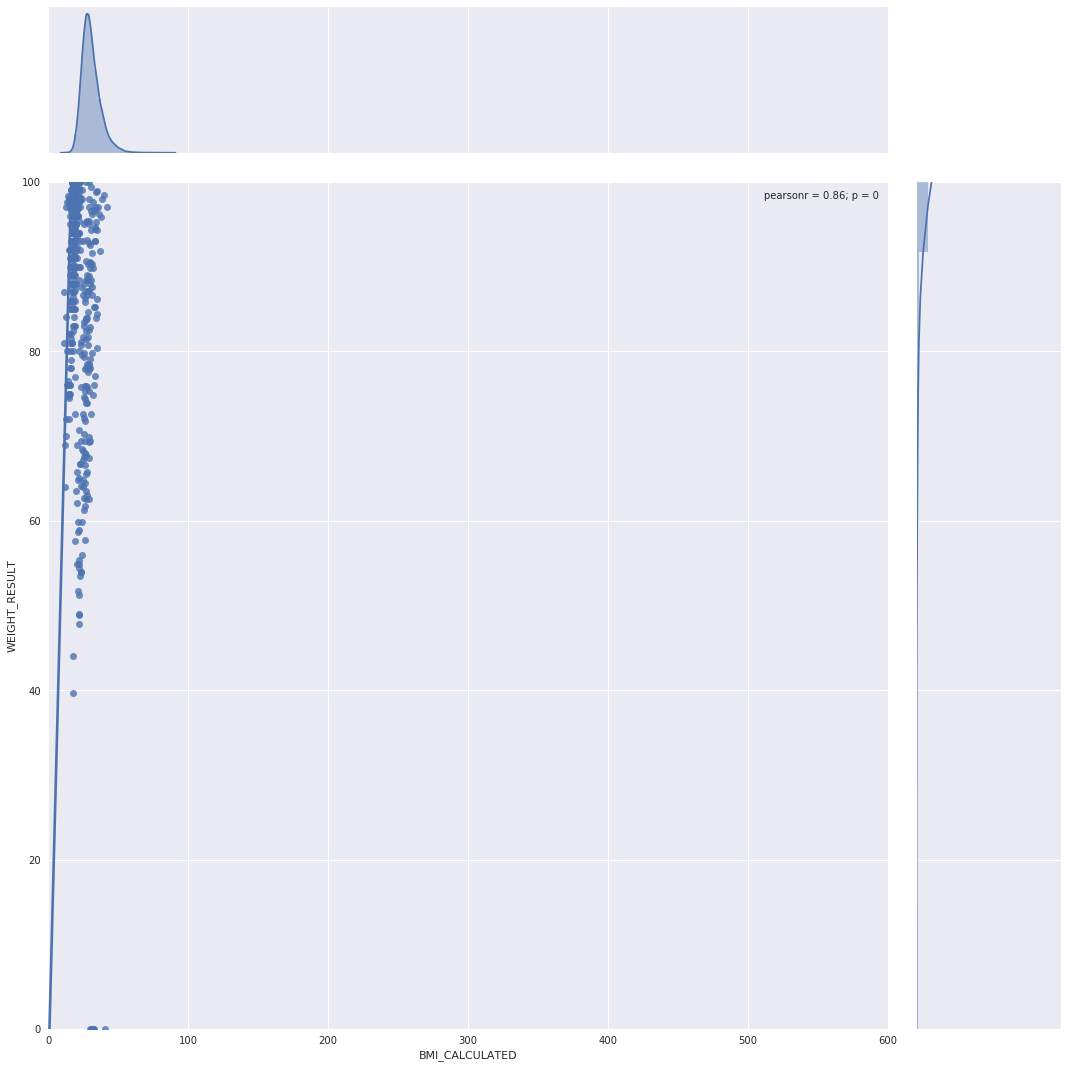

In [407]:
g = sns.jointplot("BMI_CALCULATED", "WEIGHT_RESULT", data=df2, kind="reg",
                  xlim=(0, 600), ylim=(0, 100), color="b", size=15)

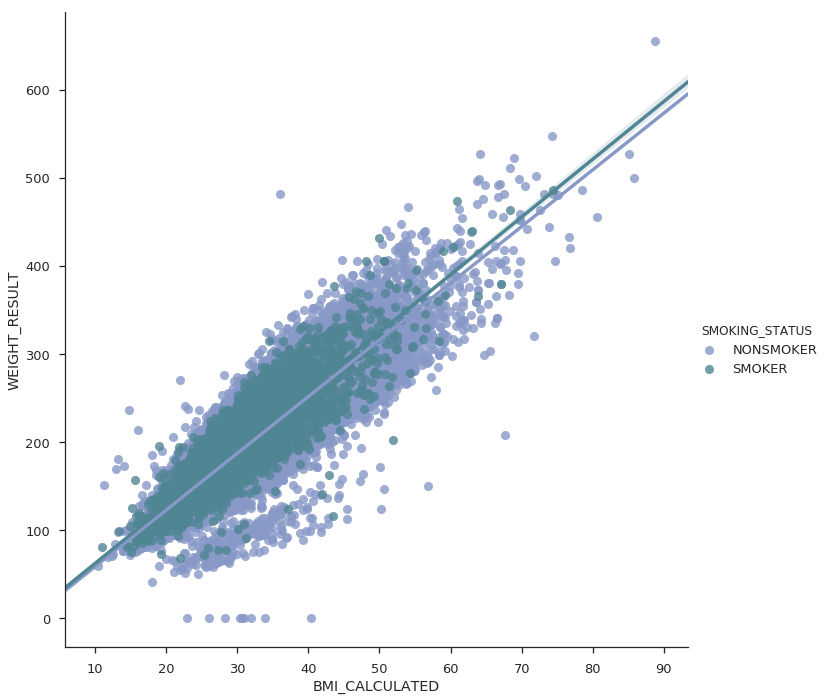

In [375]:
sns.set(style="ticks", context="talk")

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="BMI_CALCULATED", y="WEIGHT_RESULT", hue="SMOKING_STATUS", data=df2,
               palette=pal, size=10)

# Use more informative axis labels than are provided by default
g.set_axis_labels("BMI_CALCULATED", "WEIGHT_RESULT")

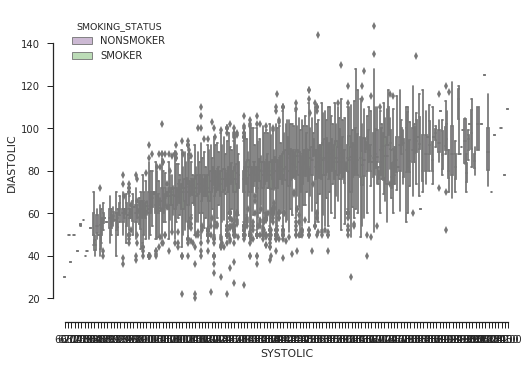

In [410]:
import seaborn as sns
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="SYSTOLIC", y="DIASTOLIC", hue="SMOKING_STATUS", data=df2, palette="PRGn")
sns.despine(offset=10, trim=True)

ValueError: Colormap vlag is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

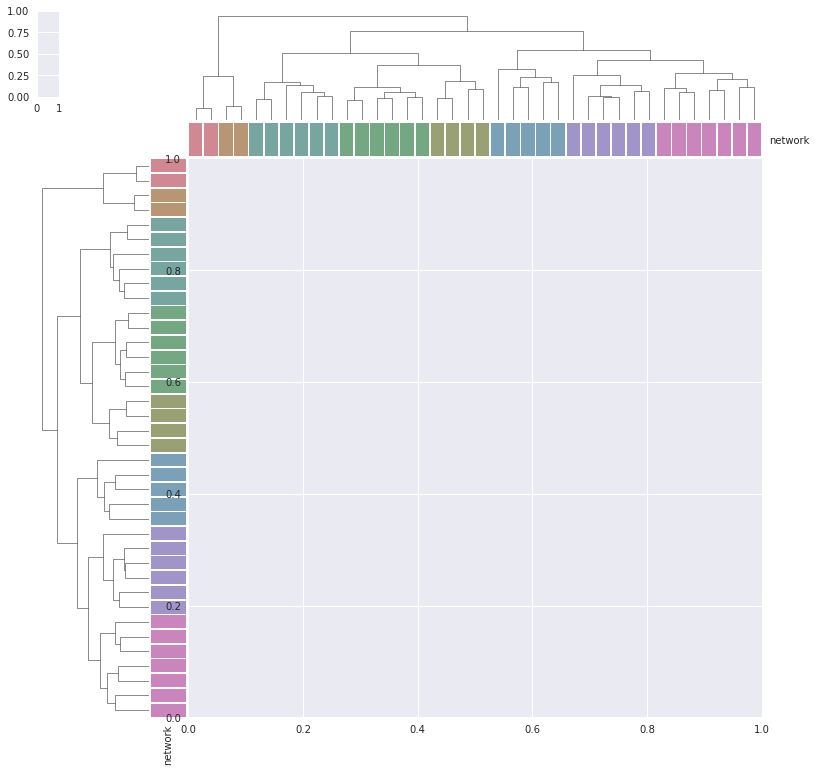

In [412]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))